# VaR for Portfolios

Almost all of the examples are in Excel, but this is much easier in Python.

In [74]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr # you'll need to pip install this first
import datetime as dt
import matplotlib.pyplot as plt 

In [75]:
tickers = ['AAPL', 'TSLA', 'GLD', 'WFC', 'IBM', 'BTC-USD', '^GSPC']

start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022, 1, 1)
 
df = pdr.get_data_yahoo(tickers, start, end, interval="d")
price_df = df['Adj Close']
# Note that we're using Pandas pct_change
ret_df = price_df.pct_change()
ret_df.dropna(inplace=True)
ret_df.head(22)

Symbols,AAPL,TSLA,GLD,WFC,IBM,BTC-USD,^GSPC
Date,,,,,,,
2021-01-05,0.012364,0.007317,0.002962,0.027946,0.017751,0.063197,0.007083
2021-01-06,-0.033662,0.028390,-0.016241,0.070750,0.024972,0.083311,0.005710
2021-01-07,0.034123,0.079447,-0.002335,0.022637,-0.002320,0.069157,0.014847
2021-01-08,0.008631,0.078403,-0.034210,-0.007179,-0.003566,0.036234,0.005492
2021-01-09,0.000000,0.000000,0.000000,0.000000,0.000000,-0.013311,0.000000
2021-01-10,0.000000,0.000000,0.000000,0.000000,0.000000,-0.047153,0.000000
2021-01-11,-0.023249,-0.078214,-0.001961,0.001506,0.000389,-0.072733,-0.006555
2021-01-12,-0.001395,0.047153,0.006474,0.021059,0.004900,-0.046215,0.000416
2021-01-13,0.016227,0.005851,-0.004307,-0.004125,-0.017723,0.100032,0.002276


## I said "d" for daily, but pandas_datareader is including the weekends.

Let's do some data cleansing and drop rows when GSPC==0. This should include holidays.

In [76]:
ret_df = ret_df[ret_df['^GSPC'] != 0.0]
ret_df.head(22)

Symbols,AAPL,TSLA,GLD,WFC,IBM,BTC-USD,^GSPC
Date,,,,,,,
2021-01-05,0.012364,0.007317,0.002962,0.027946,0.017751,0.063197,0.007083
2021-01-06,-0.033662,0.028390,-0.016241,0.070750,0.024972,0.083311,0.005710
2021-01-07,0.034123,0.079447,-0.002335,0.022637,-0.002320,0.069157,0.014847
2021-01-08,0.008631,0.078403,-0.034210,-0.007179,-0.003566,0.036234,0.005492
2021-01-11,-0.023249,-0.078214,-0.001961,0.001506,0.000389,-0.072733,-0.006555
2021-01-12,-0.001395,0.047153,0.006474,0.021059,0.004900,-0.046215,0.000416
2021-01-13,0.016227,0.005851,-0.004307,-0.004125,-0.017723,0.100032,0.002276
2021-01-14,-0.015127,-0.011013,-0.000519,0.028107,0.016152,0.050138,-0.003753
2021-01-15,-0.013731,-0.022296,-0.012408,-0.077986,-0.004497,-0.060274,-0.007190


In [77]:
cov_matrix = ret_df.cov(ddof=0) # Or should I leave it at the default ddof=1?
cov_matrix

Symbols,AAPL,TSLA,GLD,WFC,IBM,BTC-USD,^GSPC
Symbols,,,,,,,
AAPL,0.000247,0.000248,1.715032e-05,2.360193e-05,0.000012,0.000115,0.000088
TSLA,0.000248,0.001186,2.693091e-05,6.980647e-05,-0.000012,0.000377,0.000130
GLD,0.000017,0.000027,7.227916e-05,6.121459e-07,0.000019,-0.000001,0.000013
WFC,0.000024,0.000070,6.121459e-07,4.480788e-04,0.000091,0.000194,0.000078
IBM,0.000012,-0.000012,1.867883e-05,9.097043e-05,0.000207,0.000014,0.000034
BTC-USD,0.000115,0.000377,-1.224186e-06,1.942665e-04,0.000014,0.002183,0.000125
^GSPC,0.000088,0.000130,1.330417e-05,7.786094e-05,0.000034,0.000125,0.000067


## Convert the Pandas df to a NumPy matrix

In NumPy, a matrix is an array of arrays.

Reminders: 
* variance is the spread of the distribution (here, returns)
** The diagonal (AAPL vs AAPL, ... ^GSPC vs ^GSPC) is the variance
** Return's std_dev is the square root of the variance
* covariance of TSLA to TSLA is its variance
* covariance of AAPL to TSLA is how they vary together.

In [78]:
cov_np = np.array(cov_matrix)
cov_np

array([[ 2.47333536e-04,  2.47963302e-04,  1.71503226e-05,
         2.36019322e-05,  1.22635806e-05,  1.14652017e-04,
         8.78732043e-05],
       [ 2.47963302e-04,  1.18576212e-03,  2.69309132e-05,
         6.98064652e-05, -1.22180976e-05,  3.76541580e-04,
         1.29705959e-04],
       [ 1.71503226e-05,  2.69309132e-05,  7.22791613e-05,
         6.12145871e-07,  1.86788303e-05, -1.22418648e-06,
         1.33041695e-05],
       [ 2.36019322e-05,  6.98064652e-05,  6.12145871e-07,
         4.48078810e-04,  9.09704273e-05,  1.94266527e-04,
         7.78609380e-05],
       [ 1.22635806e-05, -1.22180976e-05,  1.86788303e-05,
         9.09704273e-05,  2.06516235e-04,  1.43576796e-05,
         3.43726697e-05],
       [ 1.14652017e-04,  3.76541580e-04, -1.22418648e-06,
         1.94266527e-04,  1.43576796e-05,  2.18334314e-03,
         1.24655873e-04],
       [ 8.78732043e-05,  1.29705959e-04,  1.33041695e-05,
         7.78609380e-05,  3.43726697e-05,  1.24655873e-04,
         6.7109912

In [79]:
std_dev = np.sqrt(np.diagonal(cov_np))
std_dev

array([0.01572684, 0.0344349 , 0.00850172, 0.02116787, 0.01437067,
       0.04672626, 0.00819206])

### Calculating AAPL and TSLA by hand, as a check. 

In [80]:
aapl = np.array(ret_df['AAPL'])
np.std(aapl)
tsla = np.array(ret_df['TSLA'])
np.std(tsla)

0.03443489688620107

# Single stock portfolio

But doing all the matrix stuff.

Weights so 100% in TSLA.

In [81]:
weights = np.array([1.0 if ticker=='TSLA' else 0.0 for ticker in tickers])
weights

array([0., 1., 0., 0., 0., 0., 0.])

In [82]:
weights_T = weights.T 
weights_T # I thought this would be an array of 1 x 7 !

array([0., 1., 0., 0., 0., 0., 0.])

In [83]:
np.dot(weights, cov_np)


array([ 2.47963302e-04,  1.18576212e-03,  2.69309132e-05,  6.98064652e-05,
       -1.22180976e-05,  3.76541580e-04,  1.29705959e-04])

## Calculating weighted portfolio volatility and portfolio standard deviation

In [84]:
vol = np.dot(np.dot(weights, cov_np), weights.T) # matrix equation on "Calculating VaR for a portfolio"
port_std = np.sqrt(vol)
port_std

0.03443489688620108

## Calculating average return for the portfolio and weighted average return.

In [85]:
avg_rets = ret_df.mean()
avg_rets

Symbols
AAPL       0.001409
TSLA       0.002061
GLD       -0.000220
WFC        0.002191
IBM        0.000782
BTC-USD    0.002035
^GSPC      0.001042
dtype: float64

### portfolio mean should match the by-hand calculation, above.

In [86]:
port_mean = avg_rets.dot(weights)
port_mean

0.002061082672094034

In [87]:
from scipy.stats import norm
def VaR(conf_level: int, mean: float, std_dev: float) -> float:
    tail = 1.0 - (conf_level / 100.0)
    VaR = norm.ppf(tail, mean, std_dev)
    return VaR

var_dict = {conf_level : VaR(conf_level, port_mean, port_std) for conf_level in [90, 95, 99]}
print(f'Following are based on the normal curve.')
for conf_level, var in var_dict.items():
    print(f'  {conf_level}% confidence level: loss of {var:.3%}'  )

Following are based on the normal curve.
  90% confidence level: loss of -4.207%
  95% confidence level: loss of -5.458%
  99% confidence level: loss of -7.805%


### Checking the returns for TSLA

List is 251 long. 
The 99% confidence level should be about the 1st percentile. This should be around the third number in the list. The normal curve says -0.07804, or a 7.8% loss. The third number in the historical list says -.0859 or an 8.6% loss. 

Why the difference? We are guessing VaR based on a normal curve with normal distributions, and TSLA is a real stock and we're using historical numbers.

In [88]:
tsla = np.sort(np.array(ret_df.TSLA))
tsla

array([-1.19902960e-01, -8.54985138e-02, -8.05908833e-02, -7.82141492e-02,
       -6.93207914e-02, -6.44437102e-02, -6.41987889e-02, -6.09564208e-02,
       -5.84497224e-02, -5.33447391e-02, -5.25510483e-02, -5.02771625e-02,
       -5.01537696e-02, -4.97724302e-02, -4.86221818e-02, -4.84237371e-02,
       -4.84007120e-02, -4.81604973e-02, -4.53264988e-02, -4.45276374e-02,
       -4.42482129e-02, -4.38737710e-02, -4.34676346e-02, -4.32254566e-02,
       -4.13529316e-02, -3.94716478e-02, -3.86048634e-02, -3.77992890e-02,
       -3.49893355e-02, -3.45906320e-02, -3.39966252e-02, -3.38543578e-02,
       -3.32461366e-02, -3.28307166e-02, -3.08532298e-02, -3.05375950e-02,
       -3.02749211e-02, -3.01010235e-02, -2.98574717e-02, -2.98176275e-02,
       -2.96751073e-02, -2.84578091e-02, -2.82930725e-02, -2.50576380e-02,
       -2.50255708e-02, -2.49363581e-02, -2.46270384e-02, -2.43836991e-02,
       -2.26762402e-02, -2.26356049e-02, -2.25257547e-02, -2.22958898e-02,
       -2.19173872e-02, -

## Multiple stock portfolio

(And let's start with functions for that middle section where we caldulate the portfolio mean and portfolio S.D.)

In [89]:
def portfolio_std(weights: np.array, cov_np: np.array) -> float:
    if weights.sum() != 1.0:
        raise ValueError(f'Weights must add up to 1.0. {weights} sum to {weights.sum()}')
    vol = np.dot(np.dot(weights, cov_np), weights.T)
    return np.sqrt(vol)

def avg_rets(df: pd.DataFrame, weights: np.array) -> float:
    avg_rets = df.mean()
    return avg_rets.dot(weights)

In [90]:
weights = np.array([0.15 if ticker!='^GSPC' else 0.10 for ticker in tickers])
print(f'Weights are {weights} and add up to {weights.sum()}')

Weights are [0.15 0.15 0.15 0.15 0.15 0.15 0.1 ] and add up to 1.0


In [91]:
port_std = portfolio_std(weights, cov_np)
port_std

0.012890877815352765

In [92]:
port_mean = avg_rets(ret_df, weights)
port_mean

0.001342888240391038

In [93]:
var_dict = {conf_level : VaR(conf_level, port_mean, port_std) for conf_level in [90, 95, 99]}
var_dict

{90: -0.015177436405118455,
 95: -0.01986071888878023,
 99: -0.028645777959875104}

In [94]:
print(f'Following are based on the normal curve.')
for conf_level, var in var_dict.items():
    print(f'  {conf_level}% confidence level: loss of {var:.3%}'  )

Following are based on the normal curve.
  90% confidence level: loss of -1.518%
  95% confidence level: loss of -1.986%
  99% confidence level: loss of -2.865%


# The Efficient Frontier and the Capital Allocation Line

Let's consider a simpler case of two assets.

Is it possible to maximize the expected return *and* minimize the risk (standard deviation)? 


In [95]:
# tickers are AAPL    TSLA    GLD    WFC    IBM    BTC-USD    ^GSPC
first_idx = 0
second_idx = 3
stds = []
exp_ret = []

for first in range(10, 100, 10):
    first_weight = first / 100.0
    second_weight = 1.0 - first_weight
    weights = np.array([0., 0., 0., 0., 0., 0., 0.])
    weights[first_idx] = first_weight
    weights[second_idx] = second_weight
    port_std = portfolio_std(weights, cov_np)
    port_mean = avg_rets(ret_df, weights)
    print (f'{tickers[first_idx]} weight: {first_weight:.2f}. {tickers[second_idx]} weight: {second_weight:.2f}. mean: {port_mean:.6f}. S.D. {port_std:.6f}')
    stds.append(port_std)
    exp_ret.append(port_mean)

AAPL weight: 0.10. WFC weight: 0.90. mean: 0.002113. S.D. 0.019227
AAPL weight: 0.20. WFC weight: 0.80. mean: 0.002035. S.D. 0.017442
AAPL weight: 0.30. WFC weight: 0.70. mean: 0.001957. S.D. 0.015866
AAPL weight: 0.40. WFC weight: 0.60. mean: 0.001878. S.D. 0.014567
AAPL weight: 0.50. WFC weight: 0.50. mean: 0.001800. S.D. 0.013625
AAPL weight: 0.60. WFC weight: 0.40. mean: 0.001722. S.D. 0.013117
AAPL weight: 0.70. WFC weight: 0.30. mean: 0.001644. S.D. 0.013093
AAPL weight: 0.80. WFC weight: 0.20. mean: 0.001566. S.D. 0.013556
AAPL weight: 0.90. WFC weight: 0.10. mean: 0.001488. S.D. 0.014459


# Graph the results

Text(0, 0.5, 'exp. return')

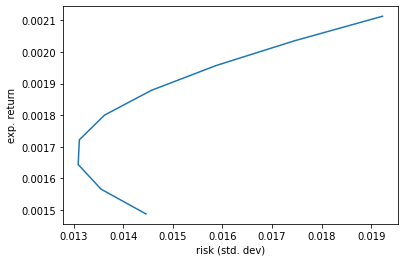

In [96]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(stds, exp_ret, color='tab:blue')
ax.set_xlabel('risk (std. dev)')  # Add an x-label to the axes.
ax.set_ylabel('exp. return')  # Add a y-label to the axes.


## Quick detour to turn the SD and means into tuples.

In [97]:
frontier = []
for sd, mean in zip(stds, exp_ret):
    frontier.append((sd, mean))
frontier[3:6]

[(0.014567452241893476, 0.0018783889758018195),
 (0.013625492748701545, 0.0018002272944606212),
 (0.013117225701562542, 0.001722065613119423)]

## Another quick detour to get me a list of repeating colors

In [98]:
from itertools import cycle
palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
tableau_iter = cycle(palette)
for i in range(12):
    print(next(tableau_iter))

tab:blue
tab:orange
tab:green
tab:red
tab:purple
tab:brown
tab:pink
tab:gray
tab:olive
tab:cyan
tab:blue
tab:orange


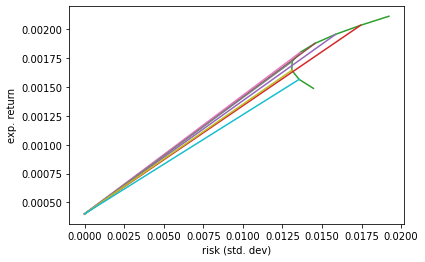

In [99]:
r_f = (0.0, 0.0004) # = 0.04%
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(stds, exp_ret, color=next(tableau_iter))
ax.set_xlabel('risk (std. dev)')  # Add an x-label to the axes.
ax.set_ylabel('exp. return')  # Add a y-label to the axes.
for point in frontier[1:-1]:
    x = [r_f[0], point[0]]
    y = [r_f[1], point[1]]
    ax.plot(x, y, color=next(tableau_iter))



### Let's add origin lines on the axes 

And also lines from the S.D. and mean.

In [110]:
tangent = frontier[4]
tangent

(0.013625492748701545, 0.0018002272944606212)

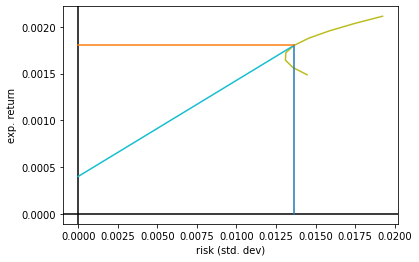

In [111]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(stds, exp_ret, color=next(tableau_iter))
ax.set_xlabel('risk (std. dev)')  # Add an x-label to the axes.
ax.set_ylabel('exp. return')  # Add a y-label to the axes.
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")
for point in frontier[4:5]:
    x = [r_f[0], point[0]]
    y = [r_f[1], point[1]]
    ax.plot(x, y, color=next(tableau_iter))

# Add the lines from the origin
x = [tangent[0], tangent[0]]
y = [0,          tangent[1]]
ax.plot(x, y, color=next(tableau_iter))
x = [0, tangent[0]]
y = [tangent[1], tangent[1]]
ax.plot(x, y, color=next(tableau_iter))


# Let's redo some of the above with namedtuples

In [112]:
point1 = frontier[3]
point1

(0.014567452241893476, 0.0018783889758018195)

In [113]:
from collections import namedtuple
Point = namedtuple("Point", "x y")
point2 = Point(0.014567451272754973, 0.001878388569797952)
point2

Point(x=0.014567451272754973, y=0.001878388569797952)

In [114]:
print (f'for point2, the standard deviation is {point2.x:.4f} and the expected return is {point2.y:.5f}.')

for point2, the standard deviation is 0.0146 and the expected return is 0.00188.


In [115]:
tan = Point(tangent[0], tangent[1])
tan

Point(x=0.013625492748701545, y=0.0018002272944606212)

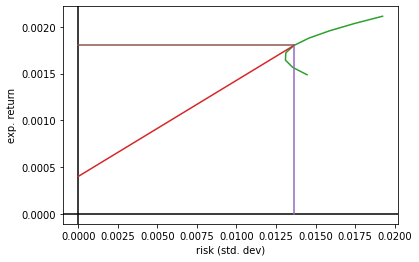

In [116]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(stds, exp_ret, color=next(tableau_iter))
ax.set_xlabel('risk (std. dev)') 
ax.set_ylabel('exp. return')  
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")
for point in frontier[4:5]:
    x = [r_f[0], point[0]]
    y = [r_f[1], point[1]]
    ax.plot(x, y, color=next(tableau_iter))

# Mild adaptation from the previous
x = [tan.x, tan.x]
y = [0, tan.y]
ax.plot(x, y, color=next(tableau_iter))

# New way: define the return start and end points.
ret_start = Point(0, tan.y)
ret_end = tan
x = [ret_start.x, ret_end.x]
y = [ret_start.y, ret_end.y]
ax.plot(x, y, color=next(tableau_iter))


# Namedtuples play nicely with dataframes

## First, original code

In [123]:
first_idx = 0
second_idx = 3
stds = []
exp_ret = []

for first in range(10, 100, 10):
    first_weight = first / 100.0
    second_weight = 1.0 - first_weight
    weights = np.array([0., 0., 0., 0., 0., 0., 0.])
    weights[first_idx] = first_weight
    weights[second_idx] = second_weight
    port_std = portfolio_std(weights, cov_np)
    port_mean = avg_rets(ret_df, weights)
    print (f'{tickers[first_idx]} weight: {first_weight:.2f}. {tickers[second_idx]} weight: {second_weight:.2f}. mean: {port_mean:.6f}. S.D. {port_std:.6f}')
    stds.append(port_std)
    exp_ret.append(port_mean)

AAPL weight: 0.10. WFC weight: 0.90. mean: 0.002113. S.D. 0.019227
AAPL weight: 0.20. WFC weight: 0.80. mean: 0.002035. S.D. 0.017442
AAPL weight: 0.30. WFC weight: 0.70. mean: 0.001957. S.D. 0.015866
AAPL weight: 0.40. WFC weight: 0.60. mean: 0.001878. S.D. 0.014567
AAPL weight: 0.50. WFC weight: 0.50. mean: 0.001800. S.D. 0.013625
AAPL weight: 0.60. WFC weight: 0.40. mean: 0.001722. S.D. 0.013117
AAPL weight: 0.70. WFC weight: 0.30. mean: 0.001644. S.D. 0.013093
AAPL weight: 0.80. WFC weight: 0.20. mean: 0.001566. S.D. 0.013556
AAPL weight: 0.90. WFC weight: 0.10. mean: 0.001488. S.D. 0.014459


In [119]:
FrontierPoint = namedtuple("FrontierPoint", "wt1 wt2 mean sd")
first_idx = 0
second_idx = 3
frontier_points = []

for first in range(10, 100, 10):
    first_weight = first / 100.0
    second_weight = 1.0 - first_weight
    weights = np.array([0., 0., 0., 0., 0., 0., 0.])
    weights[first_idx] = first_weight
    weights[second_idx] = second_weight
    port_std = portfolio_std(weights, cov_np)
    port_mean = avg_rets(ret_df, weights)
    print (f'{tickers[first_idx]} weight: {first_weight:.2f}. {tickers[second_idx]} weight: {second_weight:.2f}. mean: {port_mean:.6f}. S.D. {port_std:.6f}')
    frontier_point = FrontierPoint(wt1=first_weight, wt2=second_weight, mean=port_mean, sd=port_std)
    frontier_points.append(frontier_point)

AAPL weight: 0.10. WFC weight: 0.90. mean: 0.002113. S.D. 0.019227
AAPL weight: 0.20. WFC weight: 0.80. mean: 0.002035. S.D. 0.017442
AAPL weight: 0.30. WFC weight: 0.70. mean: 0.001957. S.D. 0.015866
AAPL weight: 0.40. WFC weight: 0.60. mean: 0.001878. S.D. 0.014567
AAPL weight: 0.50. WFC weight: 0.50. mean: 0.001800. S.D. 0.013625
AAPL weight: 0.60. WFC weight: 0.40. mean: 0.001722. S.D. 0.013117
AAPL weight: 0.70. WFC weight: 0.30. mean: 0.001644. S.D. 0.013093
AAPL weight: 0.80. WFC weight: 0.20. mean: 0.001566. S.D. 0.013556
AAPL weight: 0.90. WFC weight: 0.10. mean: 0.001488. S.D. 0.014459


In [120]:
frontier_points

[FrontierPoint(wt1=0.1, wt2=0.9, mean=0.0021128740198254146, sd=0.01922668768038567),
 FrontierPoint(wt1=0.2, wt2=0.8, mean=0.0020347123384842165, sd=0.017441800310659884),
 FrontierPoint(wt1=0.3, wt2=0.7, mean=0.001956550657143018, sd=0.015866046975555048),
 FrontierPoint(wt1=0.4, wt2=0.6, mean=0.0018783889758018195, sd=0.014567452241893476),
 FrontierPoint(wt1=0.5, wt2=0.5, mean=0.0018002272944606212, sd=0.013625492748701545),
 FrontierPoint(wt1=0.6, wt2=0.4, mean=0.001722065613119423, sd=0.013117225701562542),
 FrontierPoint(wt1=0.7, wt2=0.30000000000000004, mean=0.0016439039317782246, sd=0.01309325540888479),
 FrontierPoint(wt1=0.8, wt2=0.19999999999999996, mean=0.001565742250437026, sd=0.013556151147526799),
 FrontierPoint(wt1=0.9, wt2=0.09999999999999998, mean=0.0014875805690958278, sd=0.01445922889723504)]

In [126]:
df1 = pd.DataFrame(frontier_points)
df1

,wt1,wt2,mean,sd
0,0.1,0.9,0.002113,0.019227
1,0.2,0.8,0.002035,0.017442
2,0.3,0.7,0.001957,0.015866
3,0.4,0.6,0.001878,0.014567
4,0.5,0.5,0.001800,0.013625
5,0.6,0.4,0.001722,0.013117
6,0.7,0.3,0.001644,0.013093
7,0.8,0.2,0.001566,0.013556
8,0.9,0.1,0.001488,0.014459
